In [2]:
# Import relevant libraries

from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

In [3]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_table = soup.find('table', class_='table')
rows = mars_table.find_all('tr')
portion_of_rows = rows[:2]
print(portion_of_rows)

[<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>, <tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>]


In [6]:
# Create an empty list
mars_list = []


# Loop through the scraped data to create a list of rows
rows = mars_table.find_all('tr')
for row in rows:
    row_data = [data.text for data in row.find_all('td')]
    mars_list.append(row_data)

portion_of_mars_list = mars_list[:5]
pprint(portion_of_mars_list)


[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']]


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = []
rows2= mars_table.find_all('th')
for row in rows2:
    columns.append(row.text)
columns

df = pd.DataFrame(mars_list, columns = columns)
df = df.iloc[1:]

In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# 1. How many months are there on Mars?
df['month'].value_counts()
df['month'].unique()
df['month'].max()

12

In [13]:
# 2. How many Martian days' worth of data are there?
df['sol'].count()
df['sol'].nunique()

1867

In [14]:
# 3. What is the average low temperature by month?
temp_month = df.groupby('month')['min_temp'].mean()
temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

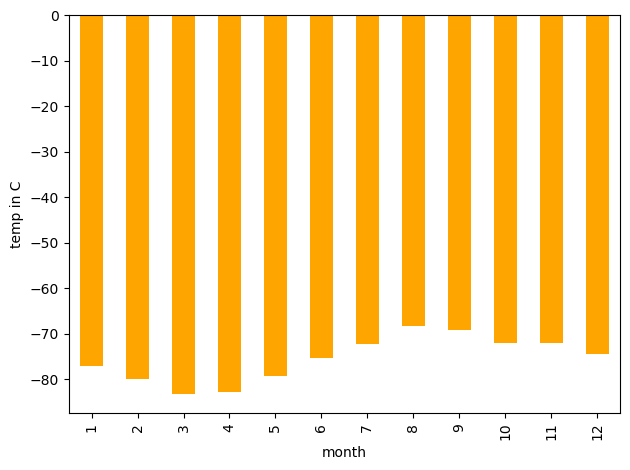

In [15]:
# Plot the average temperature by month
temp_month.plot.bar(color = 'orange')
plt.xlabel('month')
plt.ylabel('temp in C')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

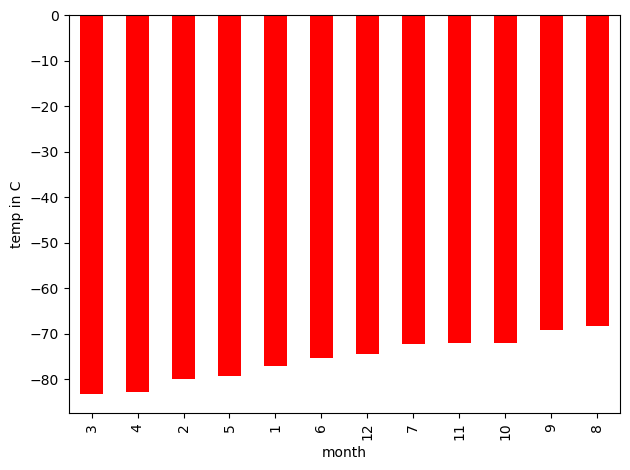

In [16]:
# Identify the coldest and hottest months in Curiosity's location
temp_month_sorted = temp_month.sort_values(ascending = True)
temp_month_sorted.plot.bar(color = 'red')
plt.xlabel('month')
plt.ylabel('temp in C')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
# 4. Average pressure by Martian month
press_month = df.groupby('month')['pressure'].mean()
press_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

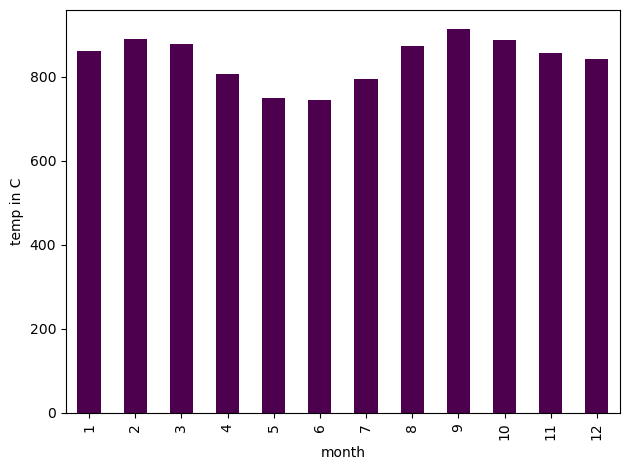

In [32]:
# Plot the average pressure by month
dark_purple = (0.3, 0, 0.3) 
press_month.plot.bar(color = dark_purple)
plt.xlabel('month')
plt.ylabel('temp in C')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
# 5. How many terrestrial (earth) days are there in a Martian year?
dayz = df['sol'].nunique()
print(dayz)
days = df['sol']
print(days)

1867
1         10
2         11
3         12
4         13
5         14
        ... 
1863    1973
1864    1974
1865    1975
1866    1976
1867    1977
Name: sol, Length: 1867, dtype: int32


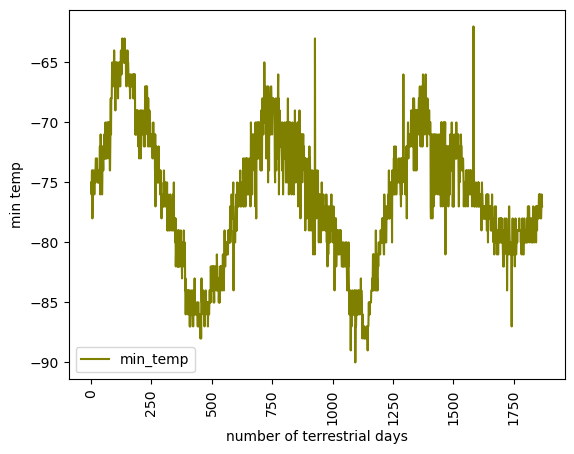

In [34]:
df.plot.line(y = 'min_temp',color = 'olive')
plt.xlabel('number of terrestrial days')
plt.ylabel('min temp')
plt.xticks(rotation=90)

plt.show()

On Mars, the lowest average minimum temperatures occur in the third month, while the highest are observed in the eighth month. Despite these variations, the temperatures remain extremely low by Earth standards.

When considering atmospheric pressure, the sixth month marks the lowest average levels, with the ninth month reaching the highest averages.

The interval between the successive peaks in the data suggests a duration of approximately 675 days, which is indicative of the length of a Martian year. This is corroborated by an internet search, which reveals that a Martian year is actually 687 Earth days long.

Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
df.to_csv('Output_data.csv', index=False)

In [36]:
browser.quit()